In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.8MB 3.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
!pip install -U mlxtend

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mutual_info_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
from sklearn.utils import check_random_state
from sklearn.utils.fixes import _astype_copy_false
from sklearn.utils.validation import check_array, check_X_y
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from scipy import special, stats
from scipy.sparse import issparse
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import (as_float_array, check_array, check_X_y, safe_sqr,safe_mask)
from sklearn.utils.extmath import safe_sparse_dot, row_norms
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import _deprecate_positional_args
from sklearn.feature_selection._base import SelectorMixin
from sklearn.metrics import roc_auc_score
from scipy.sparse import issparse
from scipy.special import digamma
import scipy.stats as stats
from subprocess import check_output
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#importing dataset
df = pd.read_csv('leukemia.tab', delimiter='\t')
df.shape

(75, 5148)

In [5]:
df.head()

,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-HSAC07/X00351_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-HUMTFRR/M11507_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-HSAC07/X00351_3_st,AFFX-HUMGAPDH/M33197_M_st,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000467_at,AB000468_at,AB000584_at,AB000905_at,...,U10690_f_at,U22029_f_at,U49974_f_at,U65918_f_at,V00532_rna1_f_at,V00533_rna1_f_at,V01516_f_at,X13930_f_at,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,X03068_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,discrete,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous
1,class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALL,88,15091,311,21,-13,215,797,14538,9738,8529,15076,11126,17782,16287,18727,15774,264,70,298,6750,6559,2982,132,546,336,151,72,281,36,-299,57,186,1647,137,803,-632,378,-26,155,...,246,26,63,60,-20,-30,488,504,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,2762,-67,346,-68,229,108,349,61,273,384,1582,185,511,389,793,329,36,191,-37
3,ALL,283,11038,134,-21,-219,116,433,615,115,1518,19448,13568,18112,17926,20668,16959,513,153,285,2215,3824,3187,301,530,418,263,21,250,43,-103,169,219,2043,188,756,-700,249,-242,131,...,394,-83,153,18,3,-135,518,440,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,1567,-88,290,14,194,303,214,-28,143,231,624,169,837,442,782,295,11,76,-14
4,ALL,309,16692,378,67,104,476,1474,5669,3272,3668,27410,16756,23006,22626,24672,18285,609,66,187,3325,3349,3097,524,911,761,88,-27,358,42,142,359,237,1997,91,2514,-603,362,-31,270,...,383,36,157,28,12,-213,426,687,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,1090,9,220,-58,294,143,464,513,238,720,753,315,1199,168,1138,777,41,228,-41


In [6]:
df=df.dropna().loc[1:,:]

In [7]:
X = df.drop(['gene'], axis=1)
X.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-HSAC07/X00351_3_at,AFFX-HUMTFRR/M11507_5_at,AFFX-HUMTFRR/M11507_M_at,AFFX-HUMTFRR/M11507_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-HSAC07/X00351_3_st,AFFX-HUMGAPDH/M33197_M_st,AFFX-HUMGAPDH/M33197_3_st,AFFX-HSAC07/X00351_M_st,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,AB000467_at,AB000468_at,AB000584_at,AB000905_at,AB001106_at,...,U10690_f_at,U22029_f_at,U49974_f_at,U65918_f_at,V00532_rna1_f_at,V00533_rna1_f_at,V01516_f_at,X13930_f_at,X53065_f_at,X64177_f_at,X67491_f_at,X71345_f_at,X97444_f_at,Z80780_f_at,X00351_f_at,X01677_f_at,M31667_f_at,L41268_f_at,X99479_f_at,HG658-HT658_f_at,M94880_f_at,X03068_f_at,U87593_f_at,U88902_cds1_f_at,AC002076_cds2_at,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,15076,11126,17782,16287,18727,15774,264,70,298,6750,6559,2982,132,546,336,151,72,281,36,-299,57,186,1647,137,803,-632,378,-26,155,355,...,246,26,63,60,-20,-30,488,504,391,-763,172,149,341,788,21210,13771,598,396,245,14476,10882,2762,-67,346,-68,229,108,349,61,273,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,19448,13568,18112,17926,20668,16959,513,153,285,2215,3824,3187,301,530,418,263,21,250,43,-103,169,219,2043,188,756,-700,249,-242,131,431,...,394,-83,153,18,3,-135,518,440,200,51,154,418,433,736,21059,15097,563,171,-149,13686,11789,1567,-88,290,14,194,303,214,-28,143,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,27410,16756,23006,22626,24672,18285,609,66,187,3325,3349,3097,524,911,761,88,-27,358,42,142,359,237,1997,91,2514,-603,362,-31,270,603,...,383,36,157,28,12,-213,426,687,387,-474,180,272,591,959,24292,17378,1808,363,325,6560,5023,1090,9,220,-58,294,143,464,513,238,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,14920,11439,17633,15770,18773,14245,183,-54,260,3058,2442,1731,-76,327,511,484,61,118,39,-11,274,245,2128,-82,1489,-909,266,-181,115,255,...,223,-46,90,-19,-36,-87,534,376,317,-336,325,149,173,431,17558,13818,576,455,594,8955,9567,1708,45,430,-35,128,22,342,142,277,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,14653,15030,17384,16386,19091,18323,291,78,287,1130,1056,728,89,120,65,118,16,197,39,237,311,186,1608,204,322,-254,554,16,45,569,...,139,45,-29,23,-20,-104,325,299,162,-56,279,183,259,605,18530,15619,65,122,126,8443,8512,1503,29,159,18,71,44,159,71,134,178,626,156,649,504,250,314,14,56,-25


In [8]:
# Mapping genes into integers
y = df['gene']
y=y.map({'ALL': 1, 'AML': 0})
y.head()

2    1
3    1
4    1
5    1
6    1
Name: gene, dtype: int64

In [9]:
df.dtypes

gene              object
AFFX-BioC-5_at    object
hum_alu_at        object
AFFX-DapX-M_at    object
AFFX-LysX-5_at    object
                   ...  
X83863_at         object
Z17240_at         object
L49218_f_at       object
M71243_f_at       object
Z78285_f_at       object
Length: 5148, dtype: object

In [10]:
print(X.shape)
print(y.shape)

(72, 5147)
(72,)


In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57, 5147), (57,), (15, 5147), (15,))

Due to huge amount of time taken to train these models, I am assigning N=k_features=3.

## Task D.1: Classifying Data with Wrapper Model Sequential Forward Search

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
knn = KNeighborsClassifier(n_neighbors=3)
sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5147 out of 5147 | elapsed:   15.5s finished

[2020-10-16 18:29:54] Features: 1/3 -- score: 0.9824561403508771[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5146 out of 5146 | elapsed:   15.5s finished

[2020-10-16 18:30:10] Features: 2/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 5145 out of 5145 | elapsed:   15.1s finished

[2020-10-16 18:30:25] Features: 3/3 -- score: 1.0

In [13]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1335,)",[0.9824561403508771],0.982456,"(M23197_at,)",NaN,0,NaN
2,"(107, 1335)",[1.0],1,"(D10495_at, M23197_at)",NaN,0,NaN
3,"(3, 107, 1335)",[1.0],1,"(AFFX-LysX-5_at, D10495_at, M23197_at)",NaN,0,NaN


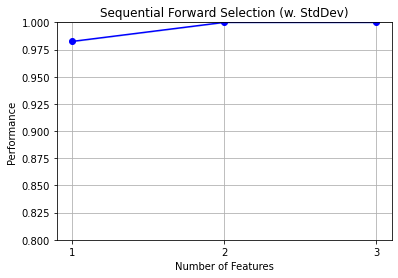

In [14]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

## Task D.2: Classifying Data with Wrapper Model Sequential Backward Search

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
sbs1 = SFS(knn, 
           k_features=1060, 
           forward=False,#False for backward approach 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sbs1 = sbs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

### Due to huge time taken, I have given Keyboard Interrupt to stop the job.

In [16]:
pd.DataFrame.from_dict(sbs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
5147,0.964912,NaN,[0.9649122807017544],"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(AFFX-BioC-5_at, hum_alu_at, AFFX-DapX-M_at, A...",0,NaN


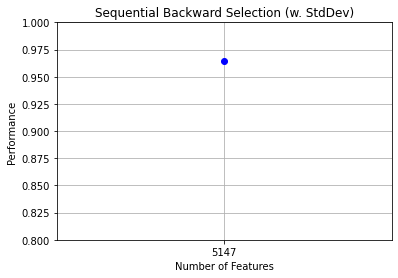

In [17]:
fig1 = plot_sfs(sbs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

### End of All Tasks and Assignment